In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sen=pd.read_csv('senado.csv')

In [3]:
abst=pd.read_csv('participacion.csv')

In [16]:
abst.habilitados.mean()*len(abst)

145973272.0

In [14]:
abst.votacion

TypeError: 'Series' object is not callable

In [18]:
abst=abst[abst.votacion=='senado']

In [4]:
dep=np.unique(sen.departamento)

In [5]:
dep=dep[dep!='Consulados']

In [19]:
votf=[]
dabst=[]
part=[]
deps=[]
vott=[]
pli=['coalición lista de la decencia (asi,up,mais)',
       'g.s.c. colombia justa libres', 'g.s.c. si se puede',
       'g.s.c. unión con fortaleza',
       'movimiento alternativo indígena y social - mais',
       'partido alianza social independiente', 'partido alianza verde',
       'partido cambio radical', 'partido centro democrático',
       'partido conservador colombiano',
       'partido fuerza alternativa revolucionaria del común',
       'partido liberal colombiano', 'partido opción ciudadana',
       'partido polo democrático alternativo', 'partido político mira',
       'partido social de unidad nacional partido de la u']
for p in pli:
    for i in dep:
        ds=sen[sen.departamento==i]
        ads=abst[abst.departamento==i]
        dabst+=[100*(1-ads.votantes.sum()/ads.habilitados.sum())]
        votf+=[100*(ds.candidato_votos[ds.partido==p]).sum()/ads.votantes.sum()]
        vott+=[(ds.candidato_votos[ds.partido==p]).sum()]
        part+=[p]
        deps+=[i]


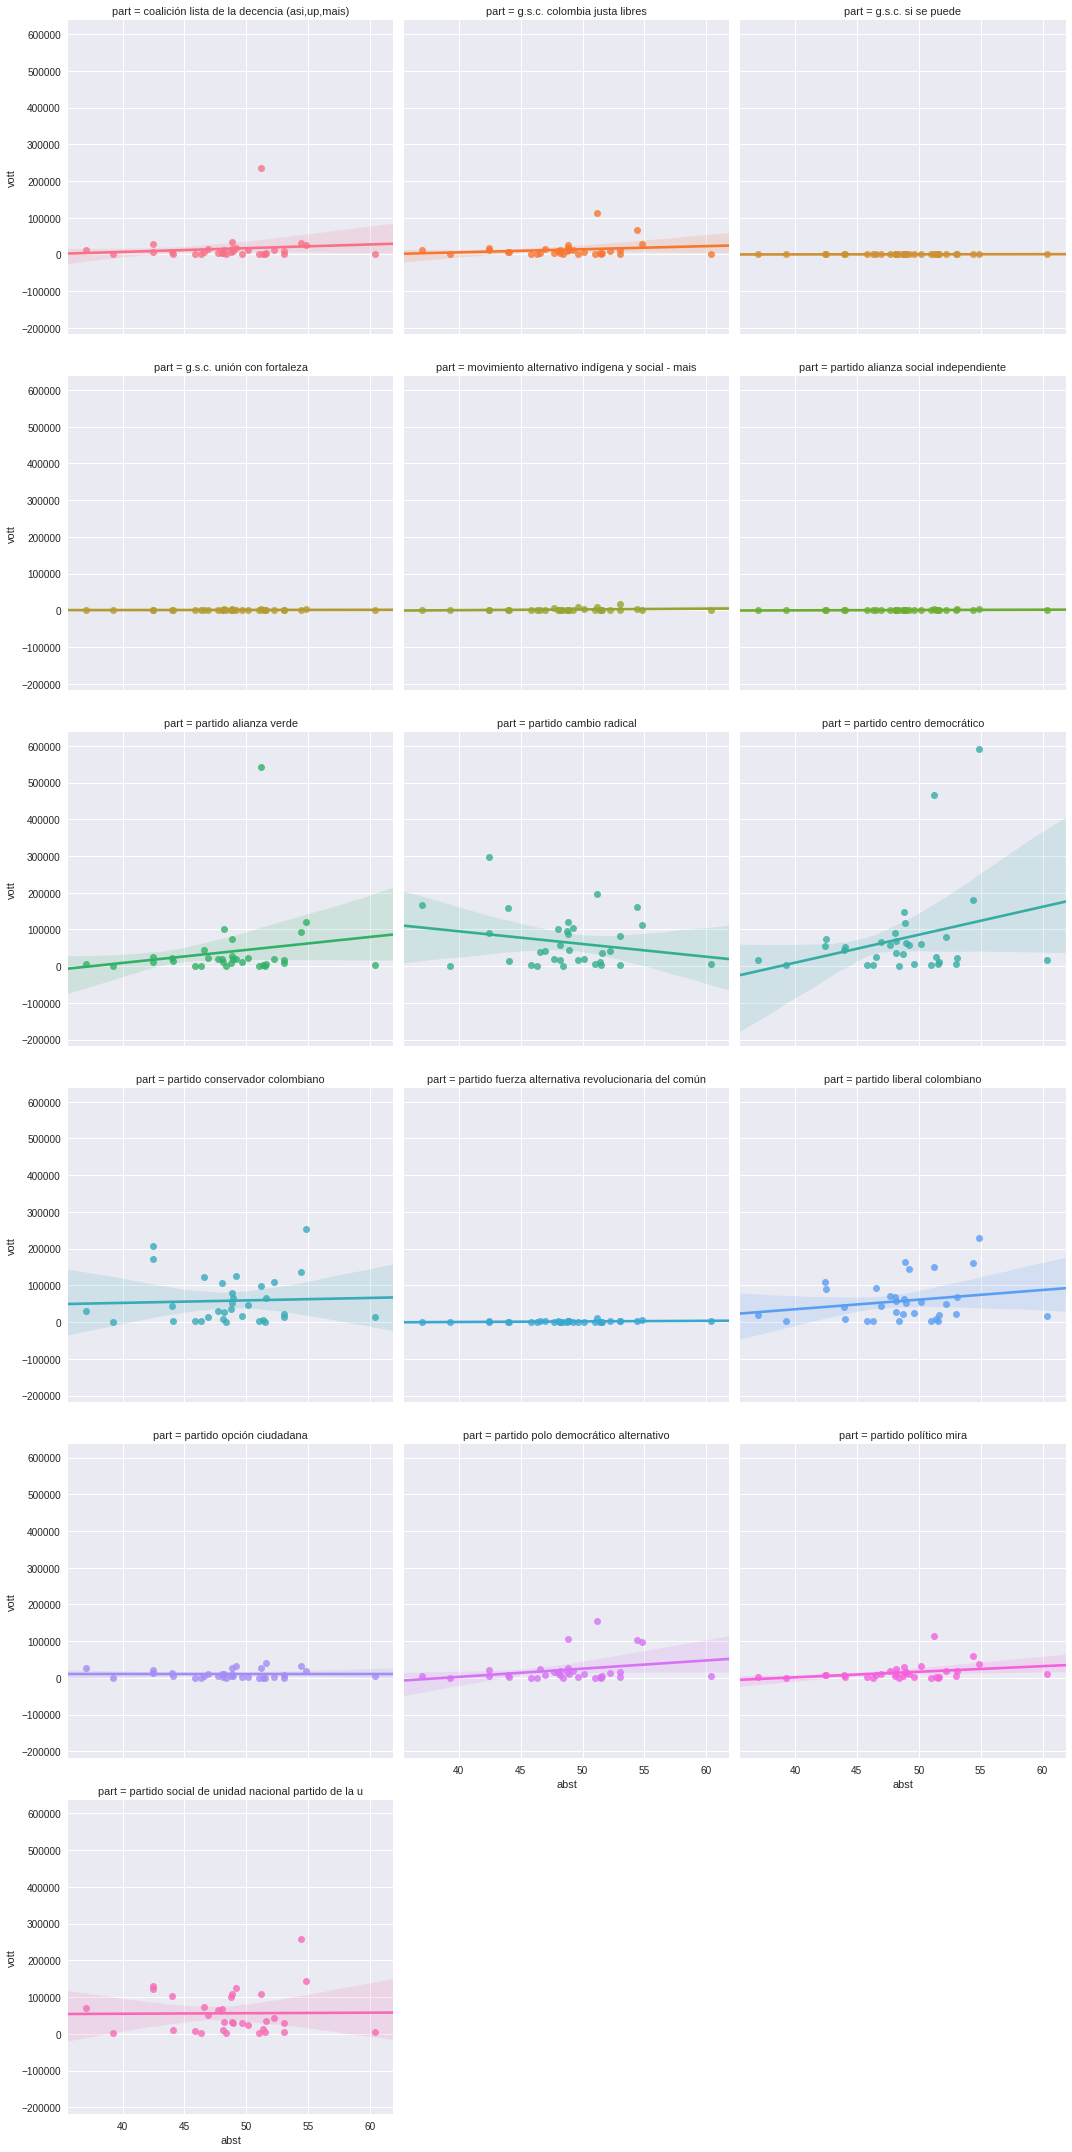

In [20]:
d = {'dep': deps, 'abst': dabst, 'vott':vott, 'votf':votf,'part':part}
df = pd.DataFrame(data=d)
sns.lmplot(x='abst',y='vott',hue='part',col='part',data=df,col_wrap=3)

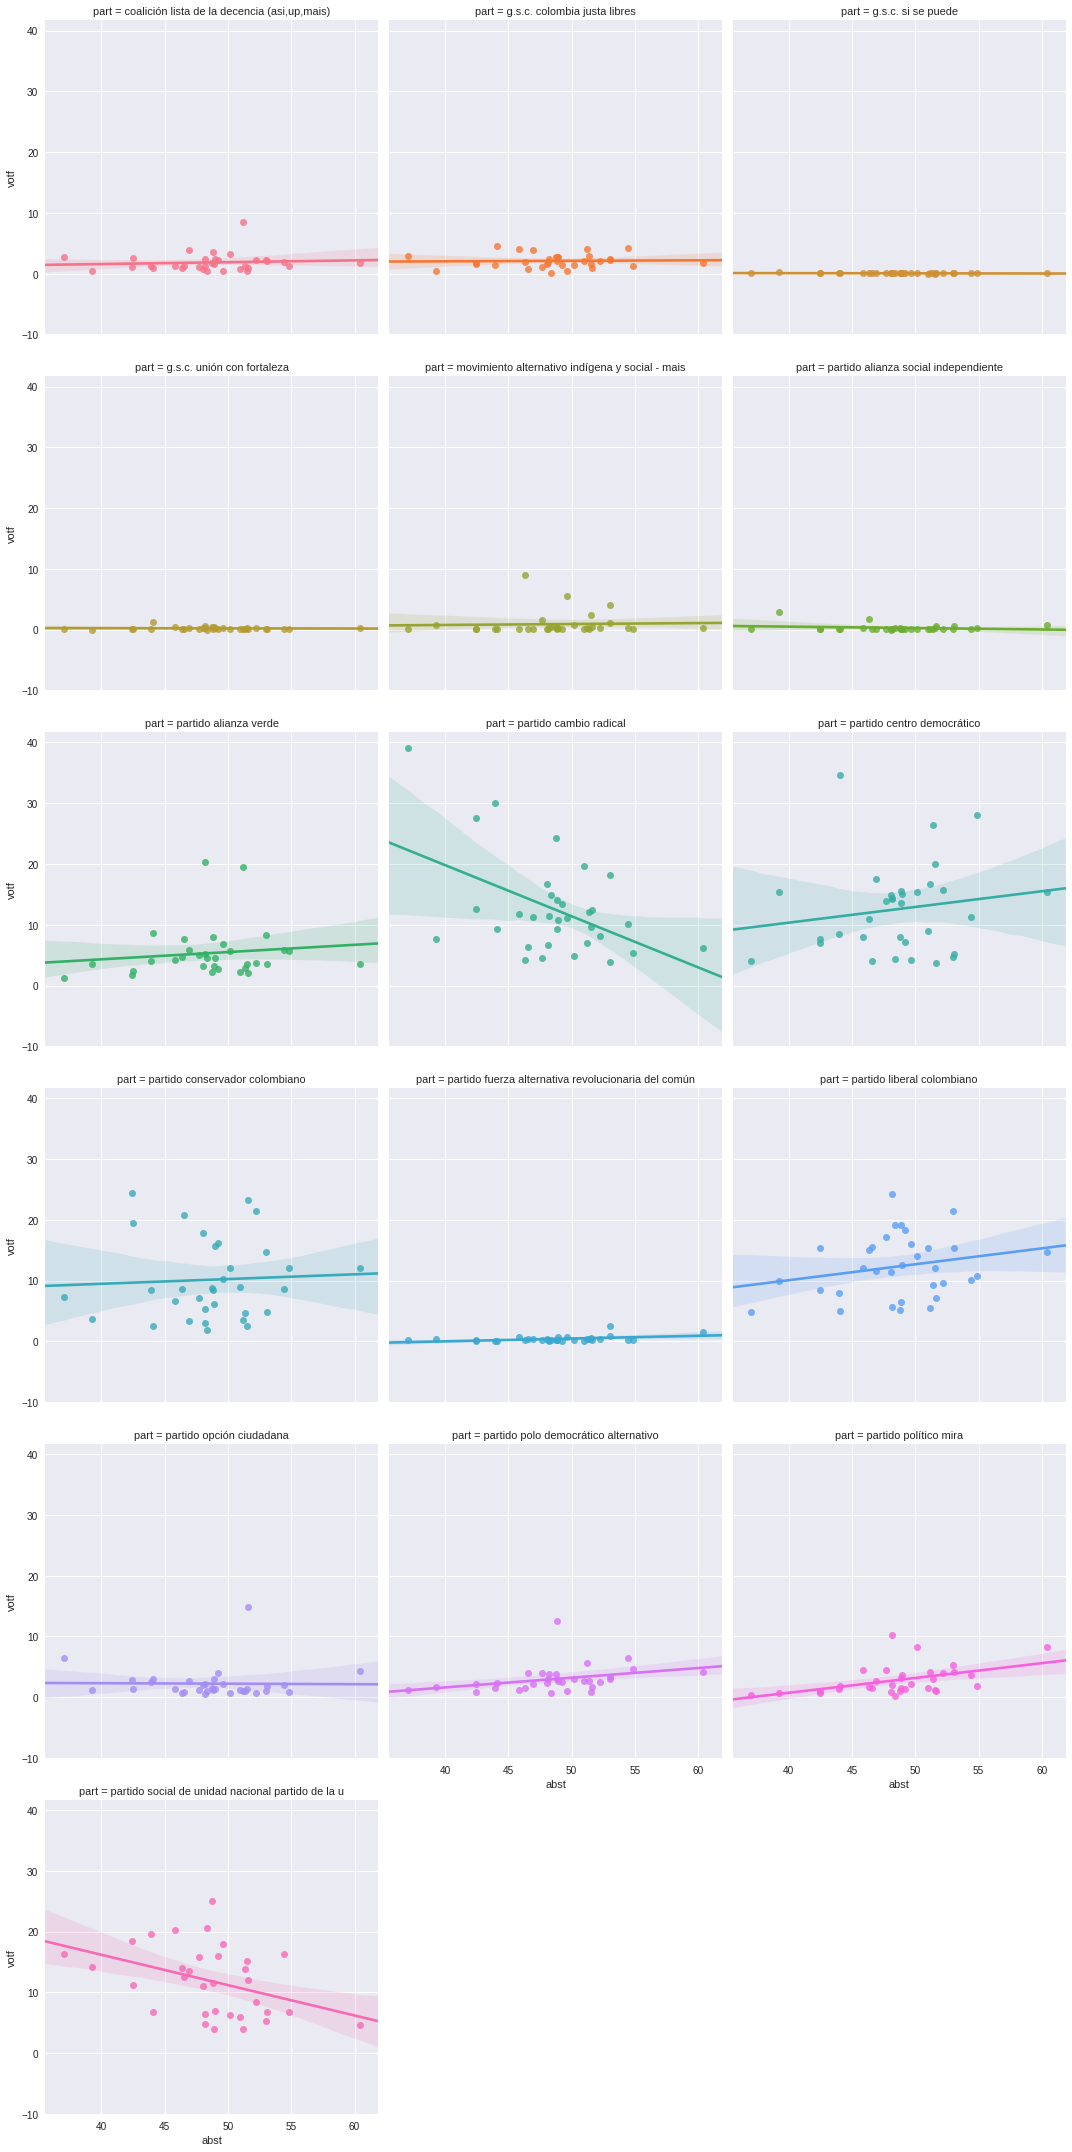

In [21]:
sns.lmplot(x='abst',y='votf',hue='part',col='part',data=df,col_wrap=3)

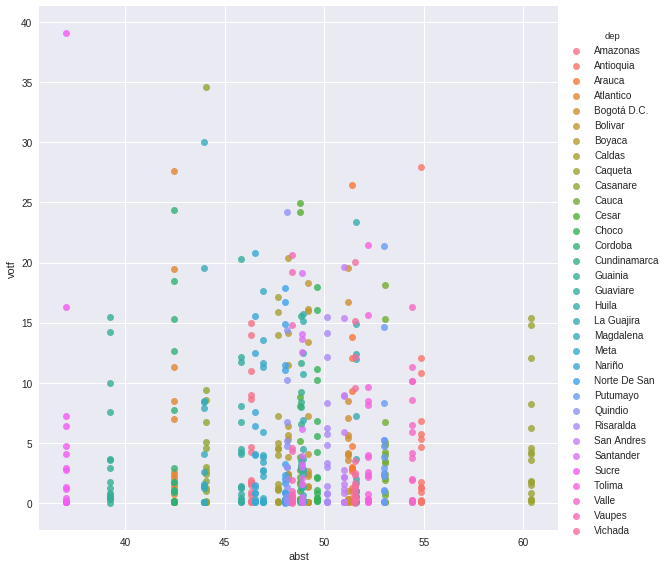

In [22]:
sns.lmplot(x='abst',y='votf',hue='dep',data=df, fit_reg=False,size=8)

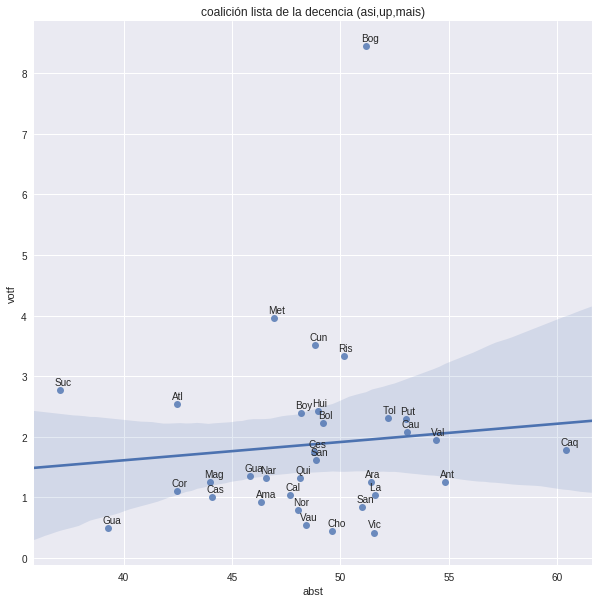

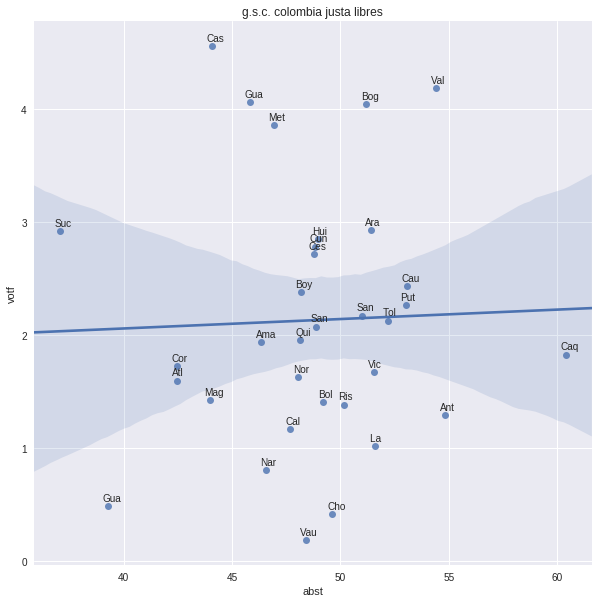

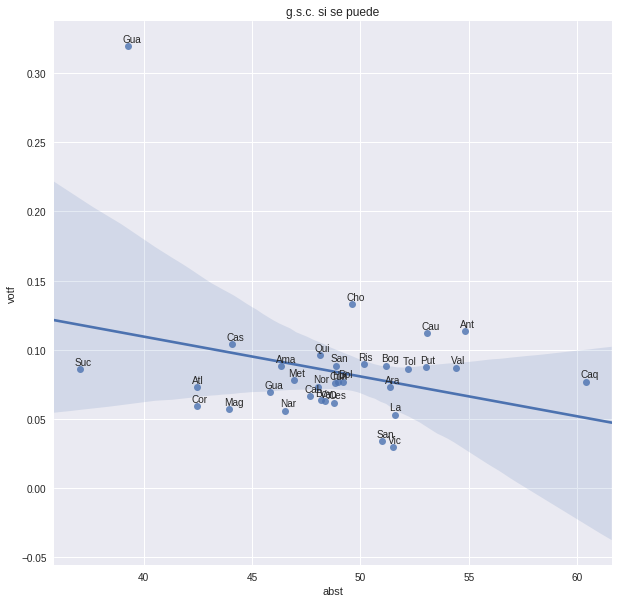

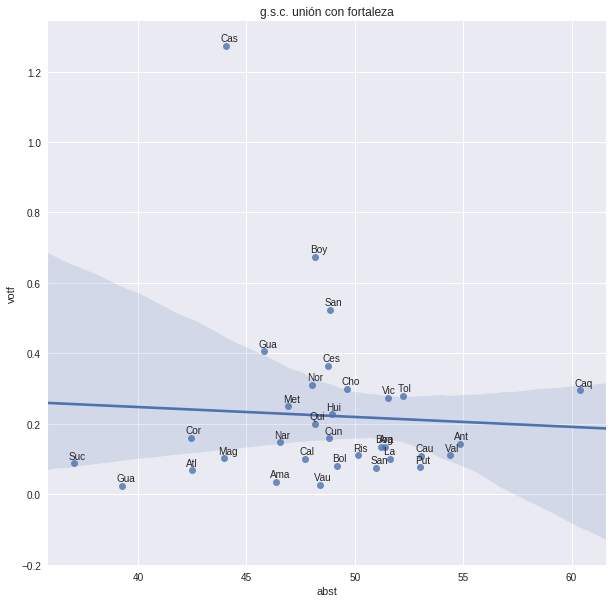

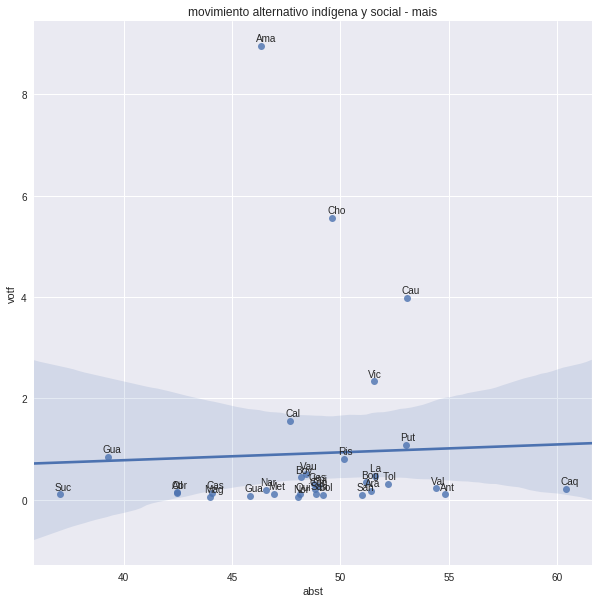

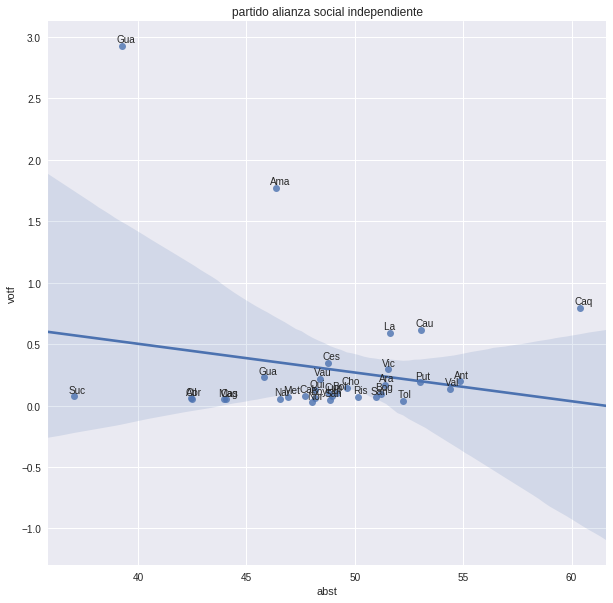

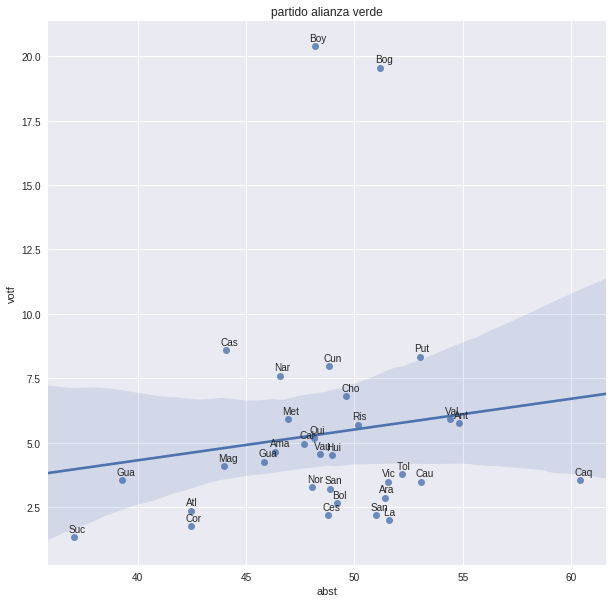

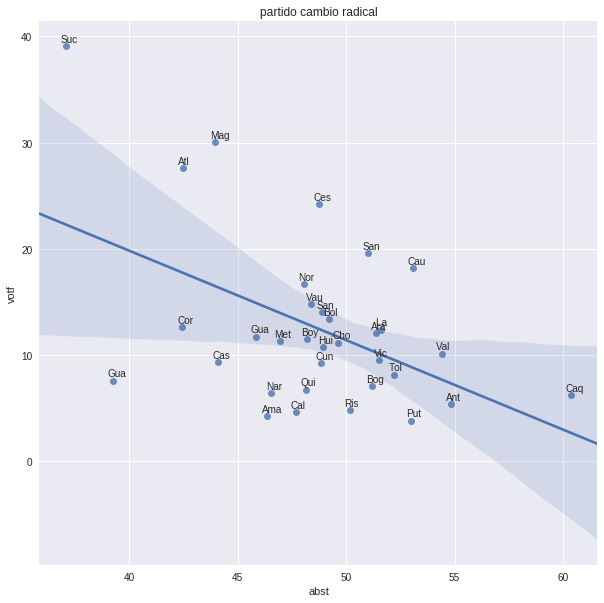

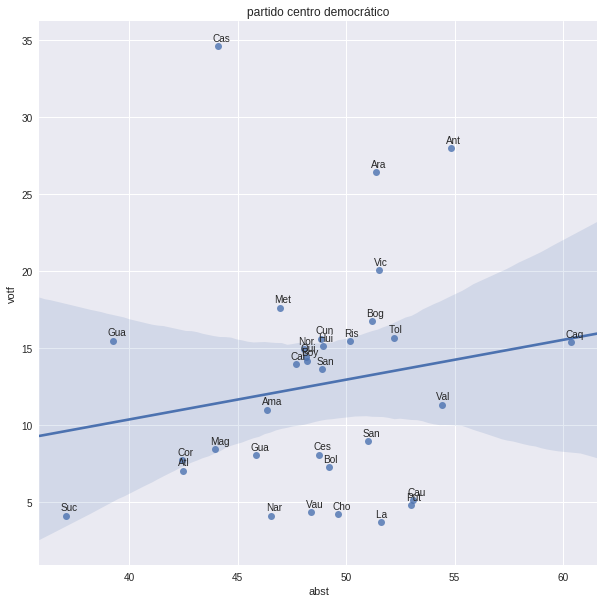

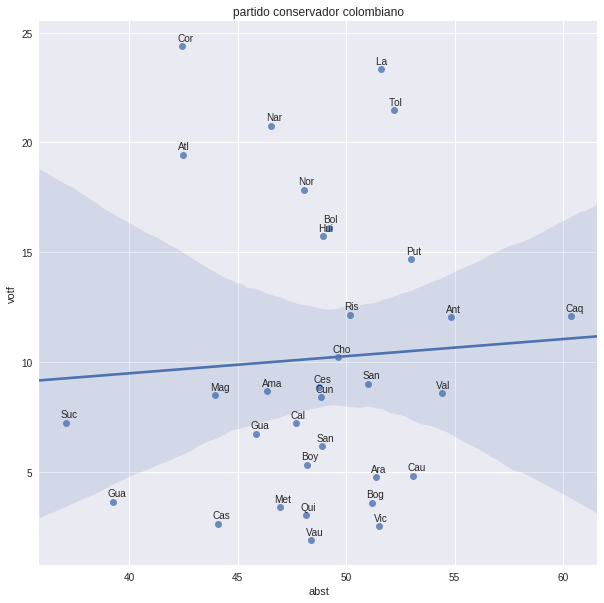

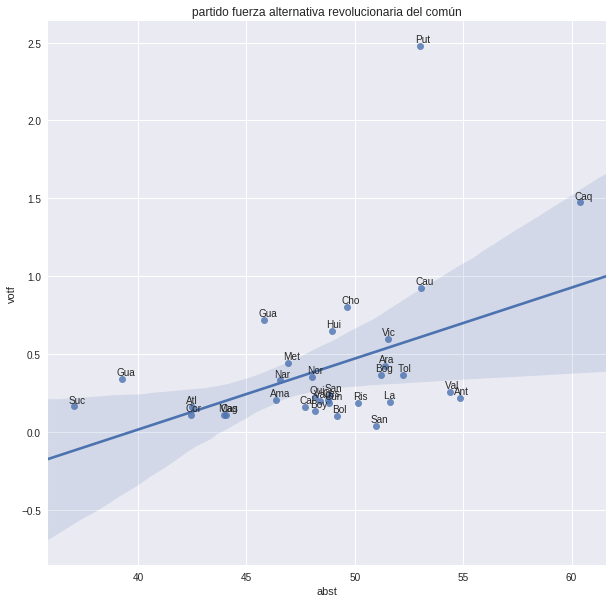

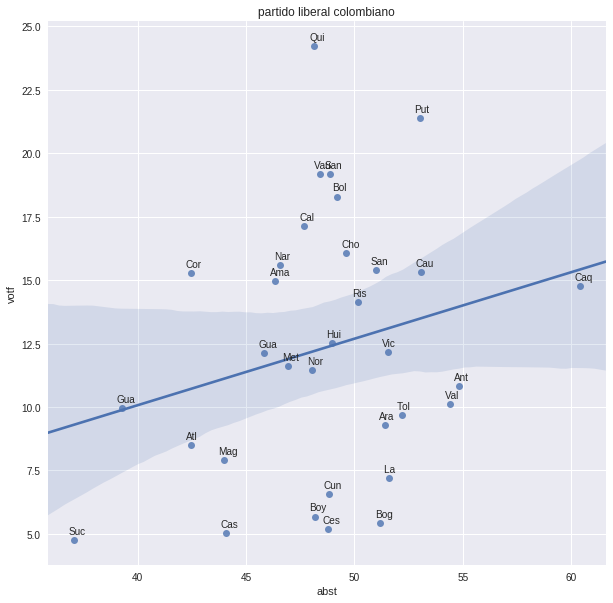

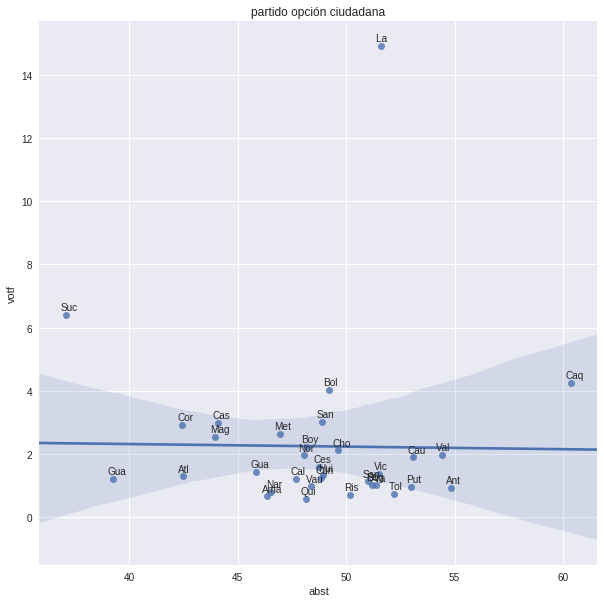

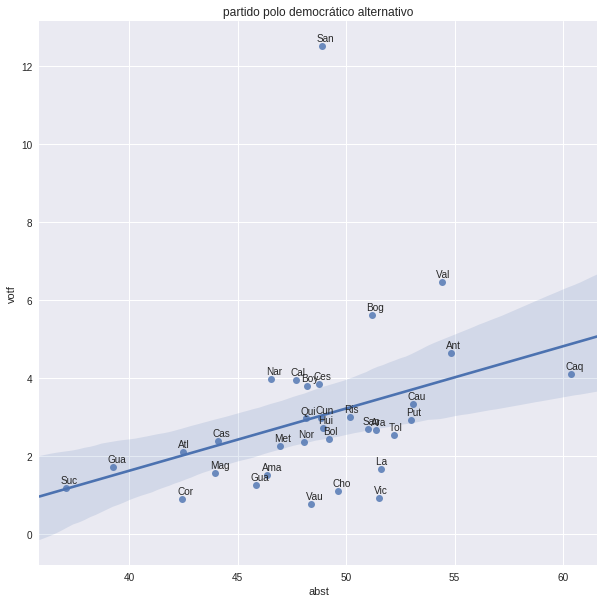

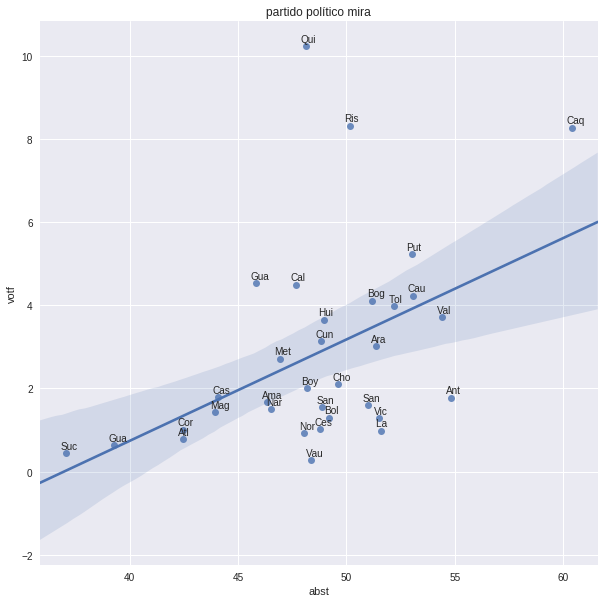

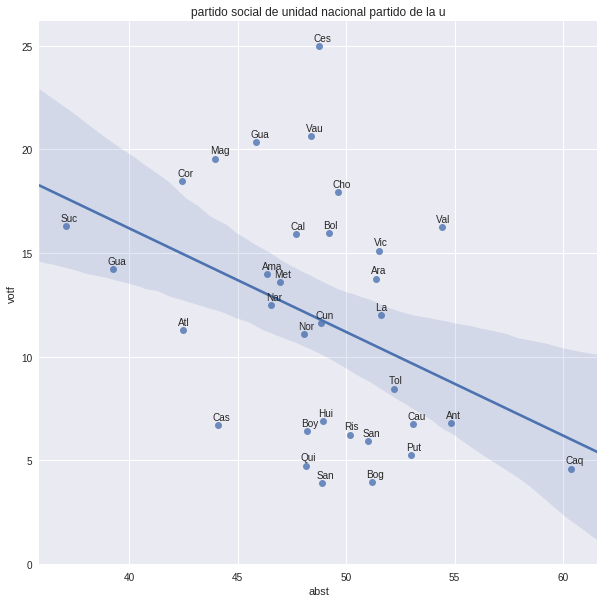

In [23]:
for k in np.unique(df.part):
    dfsel=df[df.part==k] 
    fig, ax = plt.subplots(figsize=(10,10))
    gg=sns.regplot(x='abst',y='votf',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dep)),dep):
        gg.text(dfsel.abst.iloc[i]-0.25,dfsel.votf.iloc[i]+0.01*dfsel.votf.max(),txt[0:3])
    ax.set_title(k)

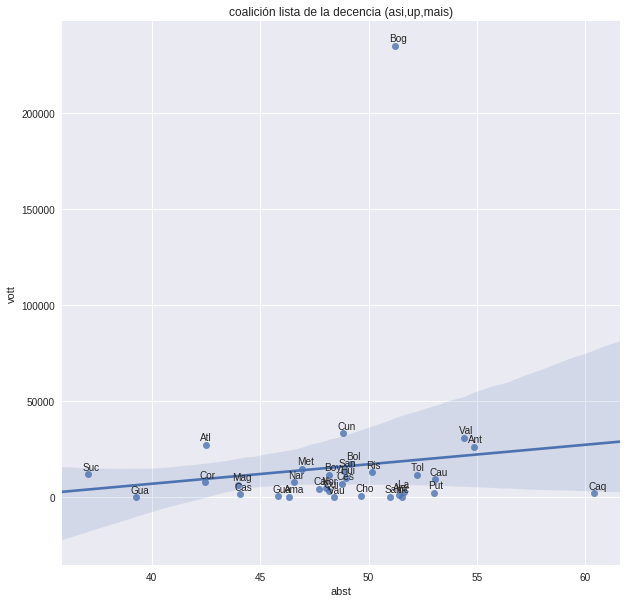

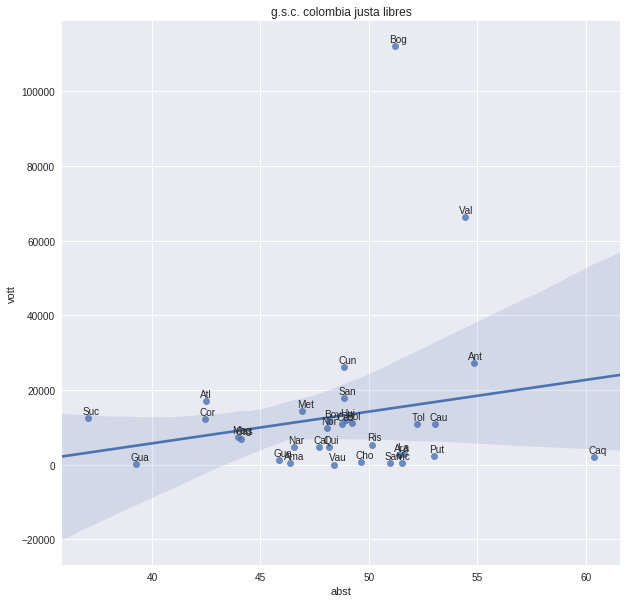

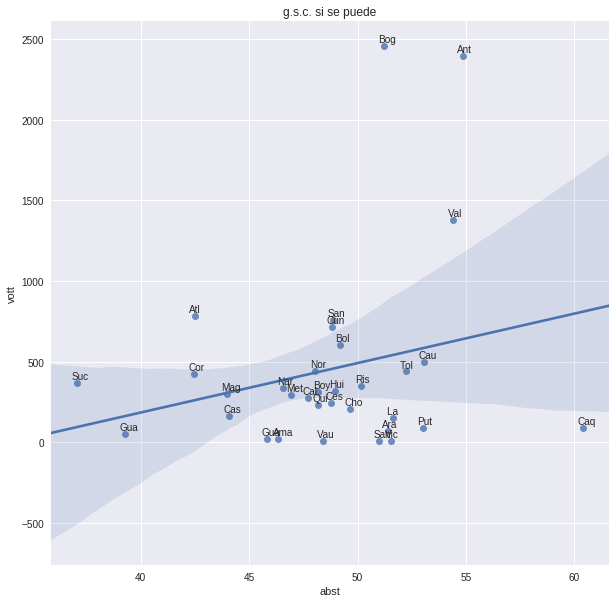

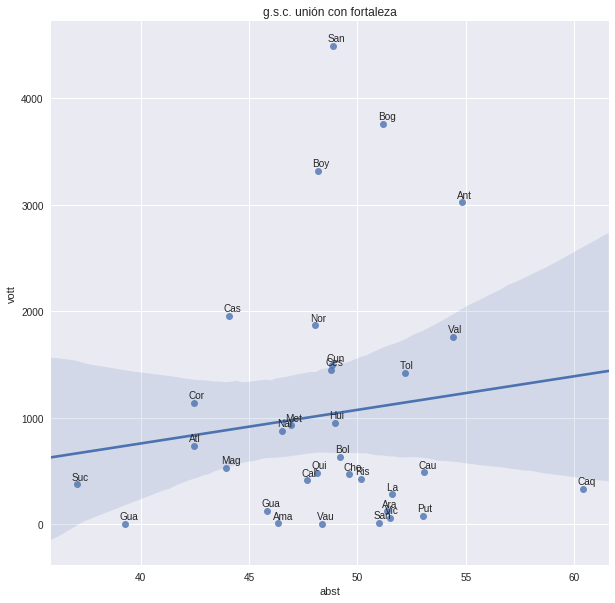

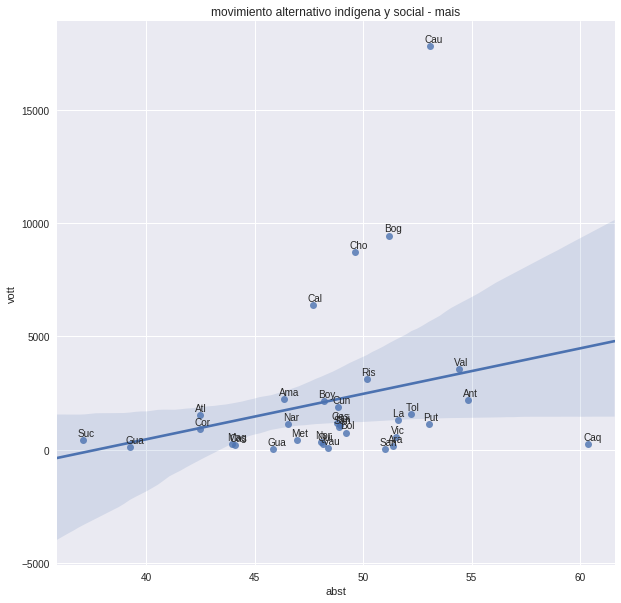

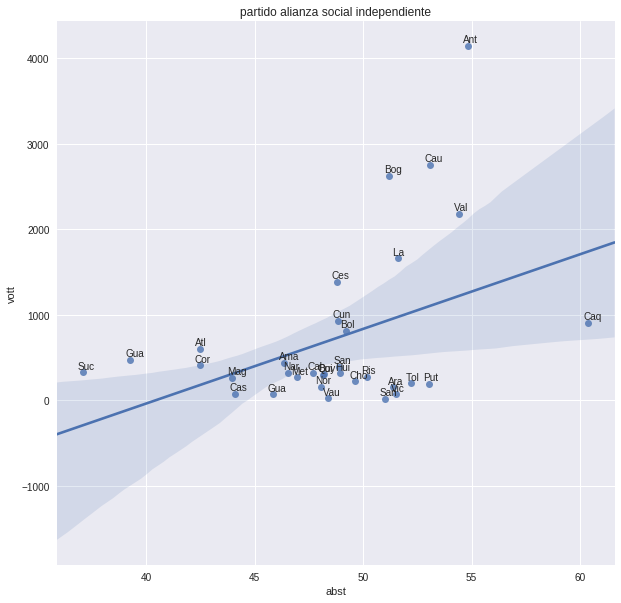

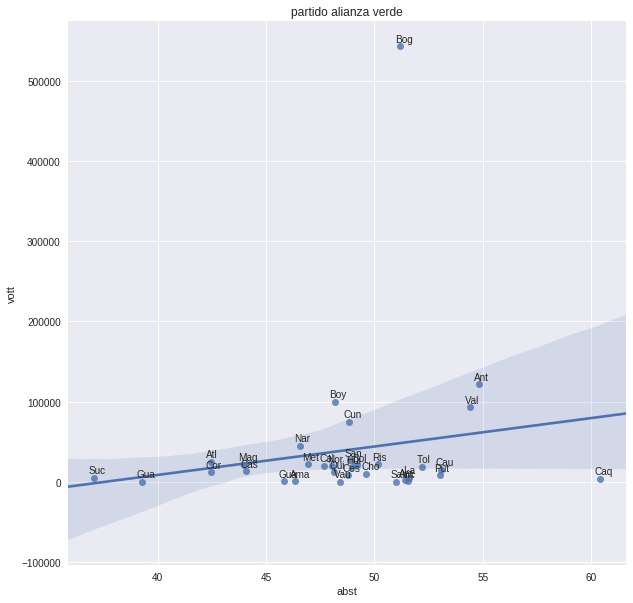

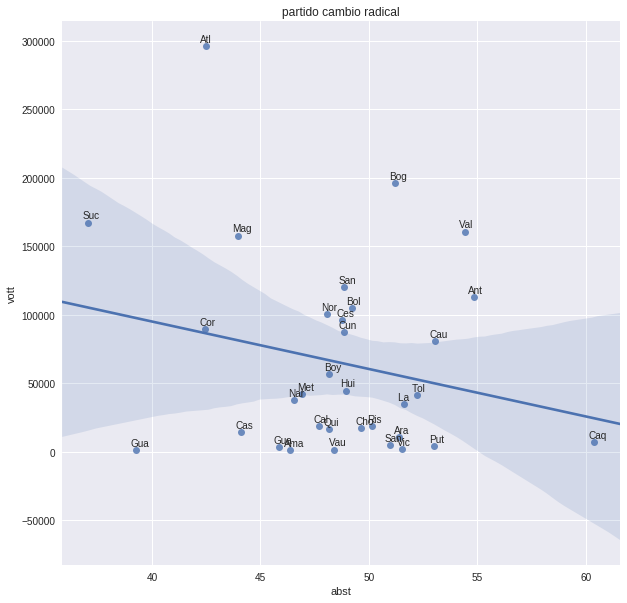

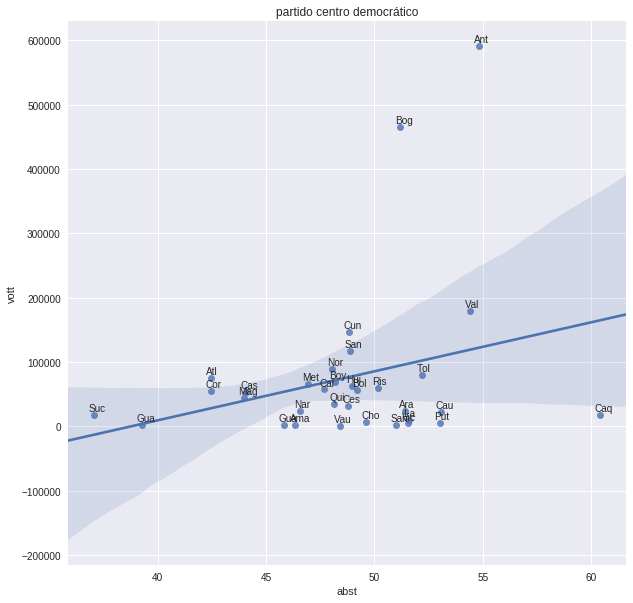

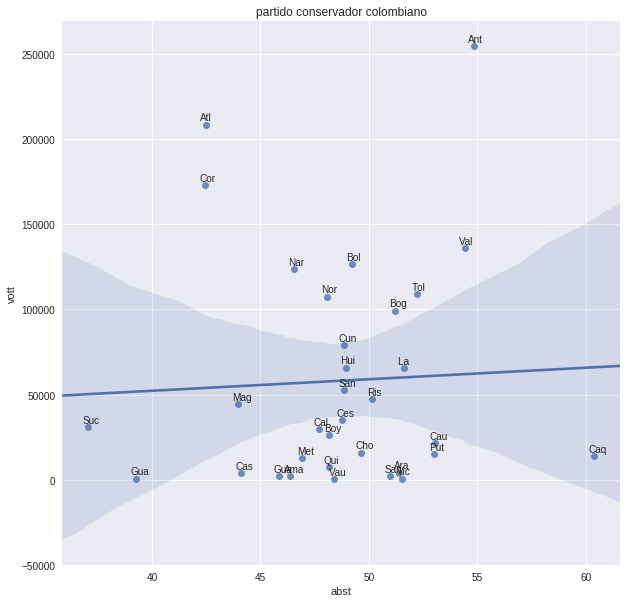

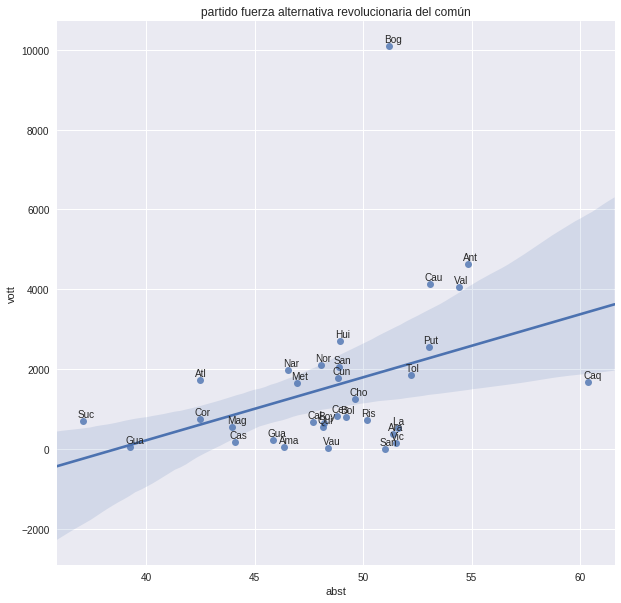

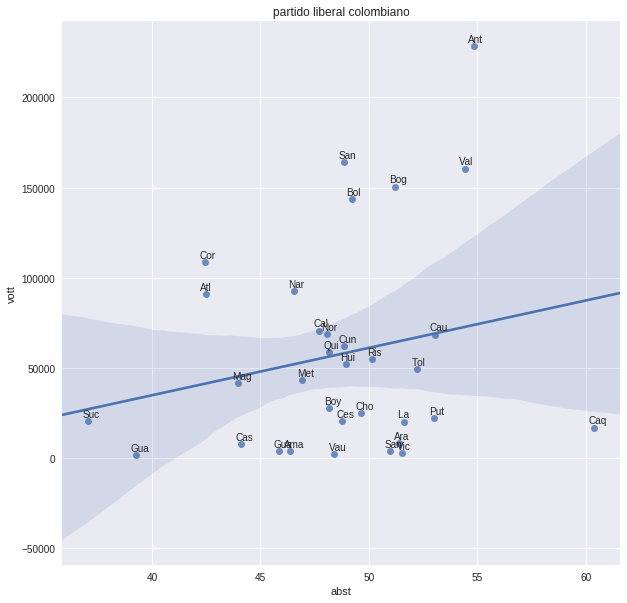

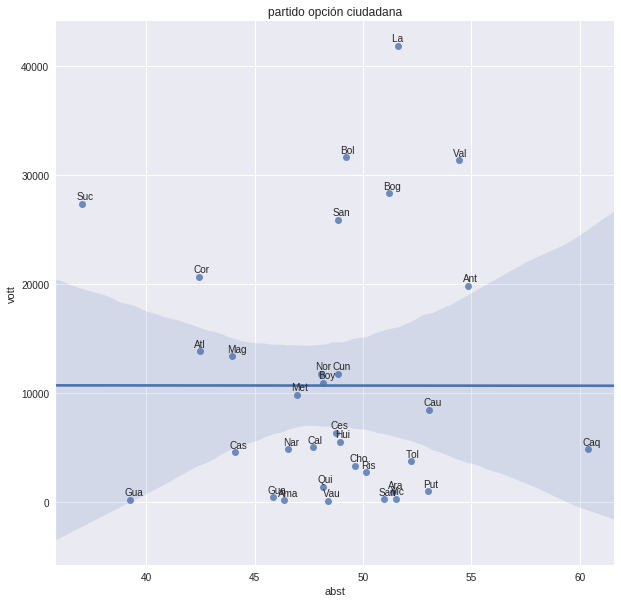

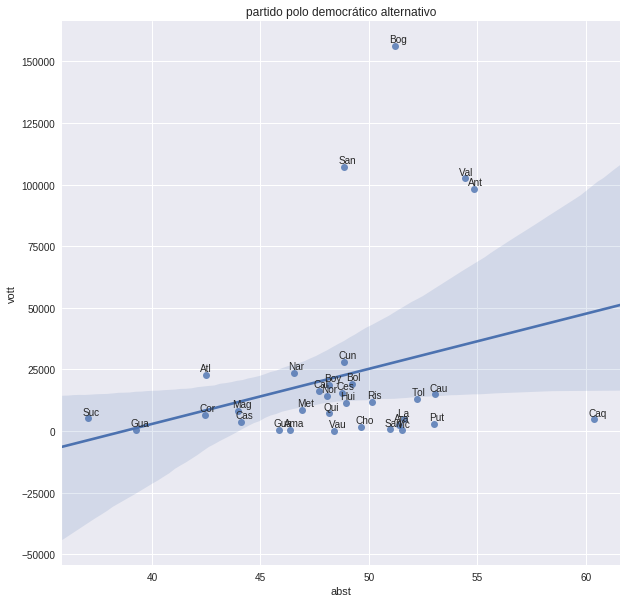

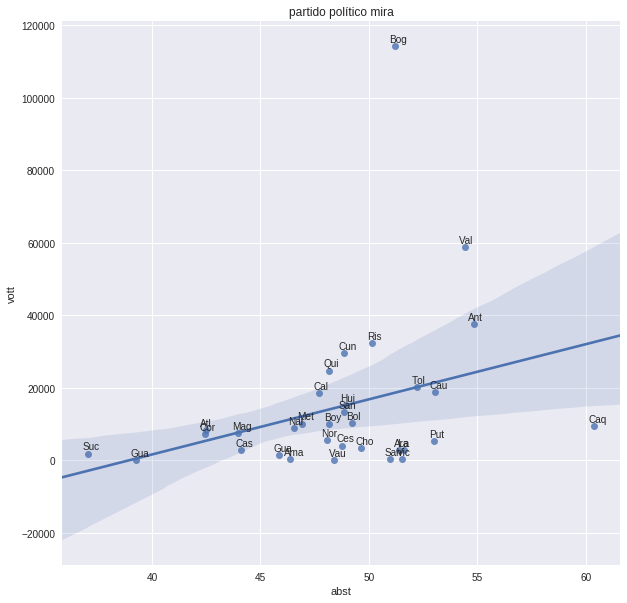

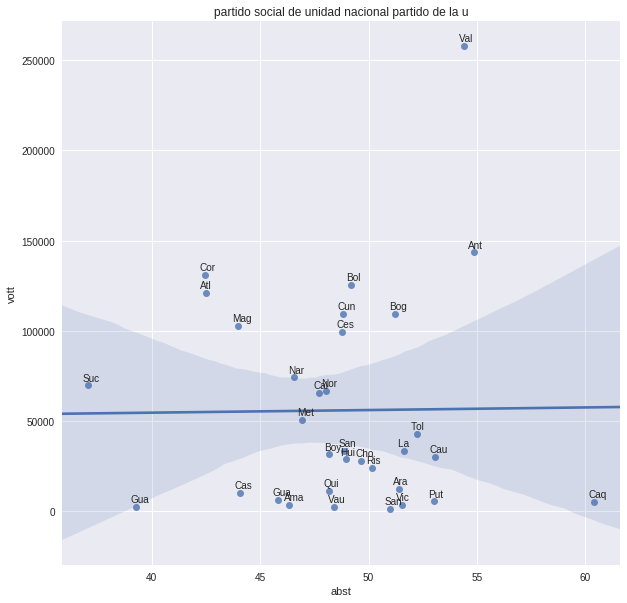

In [24]:
for k in np.unique(df.part):
    dfsel=df[df.part==k] 
    fig, ax = plt.subplots(figsize=(10,10))
    gg=sns.regplot(x='abst',y='vott',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dep)),dep):
        gg.text(dfsel.abst.iloc[i]-0.25,dfsel.vott.iloc[i]+0.01*dfsel.vott.max(),txt[0:3])
    ax.set_title(k)

In [ ]:
mun=np.unique[municipio]

In [12]:
sample=ds[ds.municipio==i]

In [20]:
sample.head()

,candidato_nombre,candidato_porcentaje,candidato_votos,partido,circunscripcion,departamento,municipio
355386,(001) alvaro uribe velez,14.74,545,partido centro democrático,senado_circunscripción_nacional,Antioquia,Abejorral
355387,solo por la lista,5.84,216,partido centro democrático,senado_circunscripción_nacional,Antioquia,Abejorral
355388,(024) maria regina zuluaga henao,2.27,84,partido centro democrático,senado_circunscripción_nacional,Antioquia,Abejorral
355389,(006) paola andrea holguin moreno,0.97,36,partido centro democrático,senado_circunscripción_nacional,Antioquia,Abejorral
355390,(004) fernando nicolas araujo rumie,0.62,23,partido centro democrático,senado_circunscripción_nacional,Antioquia,Abejorral


In [28]:
len(np.unique(sen.departamento+'_'+sen.municipio))

1191

In [19]:
sample.candidato_votos[sample.partido=='partido centro democrático'].sum()

1053

,departamento,habilitados,municipio,votantes,votos_no_marcados,votos_nulos,votacion
0,Boyaca,11927,Nobsa,7761,88,605,camara
1,Boyaca,4327,Paz De Rio,2228,71,147,camara
2,Valle,28231,Caicedonia,11610,520,1138,camara
3,Cundinamarca,11589,Anapoima,5185,153,380,camara
4,Huila,18816,Isnos,9440,562,741,camara
